In [1]:
# Import relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import math
import numpy as np
from pprint import pprint

## Basic Data Description 

#### How many rows & columns do these data sets have? 
* 'Year 2009-2010-Table 1' has 525461 rows and 8 columns.
* 'Year 2010-2011-Table 1' has 541910 rows and 8 columns.
#### What types of columns are in these data sets?
Without altering, both data sets have five string type columns, one integer type column, and two float type columns.

When 'InvoiceDate' is altered into a datetime column both datasets have four string type columns, one integer type column, two float type columns, and one datetime column.
#### How many invoices are in each data set? 
* 'Year 2009-2010-Table 1' has 28816 invoices.
* 'Year 2010-2011-Table 1' has 25900 invoices.
#### How many invoices are missing a corresponding customer ID?
* 'Year 2009-2010-Table 1' has 5229 invoices with a null customer ID.
* 'Year 2010-2011-Table 1' has 3710 invoices with a null customer ID.
#### What is the range of prices in each data set (min and max)?
* 'Year 2009-2010-Table 1':
  * Min: -53594.36 
  * Max: 25111.09
* 'Year 2010-2011-Table 1':
  * Min: -11062.06
  * Max: 38970.00

In [3]:
filepath = os.path.join(os.getcwd(), 'data', 'Year 2009-2010-Table 1.csv') # load and read the file
year0910_data = pd.read_csv(filepath, parse_dates = ["InvoiceDate"])

print(year0910_data.shape)  # print the shape (num of rows, num of columns)
print(year0910_data.info()) # print the info, can see column names, data types, how many non-null objects
print('Number of invoices: ', year0910_data['Invoice'].nunique()) # find number of invoices
year0910_data.describe() # describe to find analysis of all numerical columns

/var/folders/v4/5kxswy5d5wv4lkvdbrf2rmdw0000gn/T/ipykernel_17925/1293641087.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year0910_data = pd.read_csv(filepath, parse_dates = ["InvoiceDate"])


(525461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
Number of invoices:  28816


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [41]:
noID_0910 = year0910_data.loc[year0910_data['Customer ID'].isnull()]
noID_0910['Invoice'].nunique()

5229

In [4]:
filepath = os.path.join(os.getcwd(), 'data', 'Year 2010-2011-Table 1.csv') # load and read the file
year1011_data = pd.read_csv(filepath, parse_dates = ["InvoiceDate"]) 
print(year1011_data.shape) # print the shape (num of rows, num of columns)
print(year1011_data.info()) # print the info, can see column names, data types, how many non-null objects
print('Number of invoices: ', year1011_data['Invoice'].nunique()) # find number of invoices
year1011_data.describe() # describe to get analysis of all numerical columns

/var/folders/v4/5kxswy5d5wv4lkvdbrf2rmdw0000gn/T/ipykernel_17925/3449933555.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year1011_data = pd.read_csv(filepath, parse_dates = ["InvoiceDate"])


(541910, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
Number of invoices:  25900


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [43]:
noID_1011 = year1011_data.loc[year1011_data['Customer ID'].isnull()]
noID_1011['Invoice'].nunique()

3710

## Question 1: How do countries compare in financial demand? 

In this question I looked to analyze how the different countries compare by financial demand. I did this by creating a new column 'total revenue' that calculates the revenue from a purchase based on the price & quantity. I then grouped the data by the sum of the total revenue per country, and created a bar plot based on that. 

The revenue from the UK is much higher than the others so I also created a bar plot excluding the UK so that the other countries could be compared in more detail as well. 

From these graphs, it can be seen that **the UK, EIRE, the Netherlands, Germany, and France have the highest financial demand.**

/var/folders/v4/5kxswy5d5wv4lkvdbrf2rmdw0000gn/T/ipykernel_17925/4152664537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_sales['Total_Revenue'] = store_data_sales['Quantity'] * store_data_sales['Price'] #new column for total revenue from sales


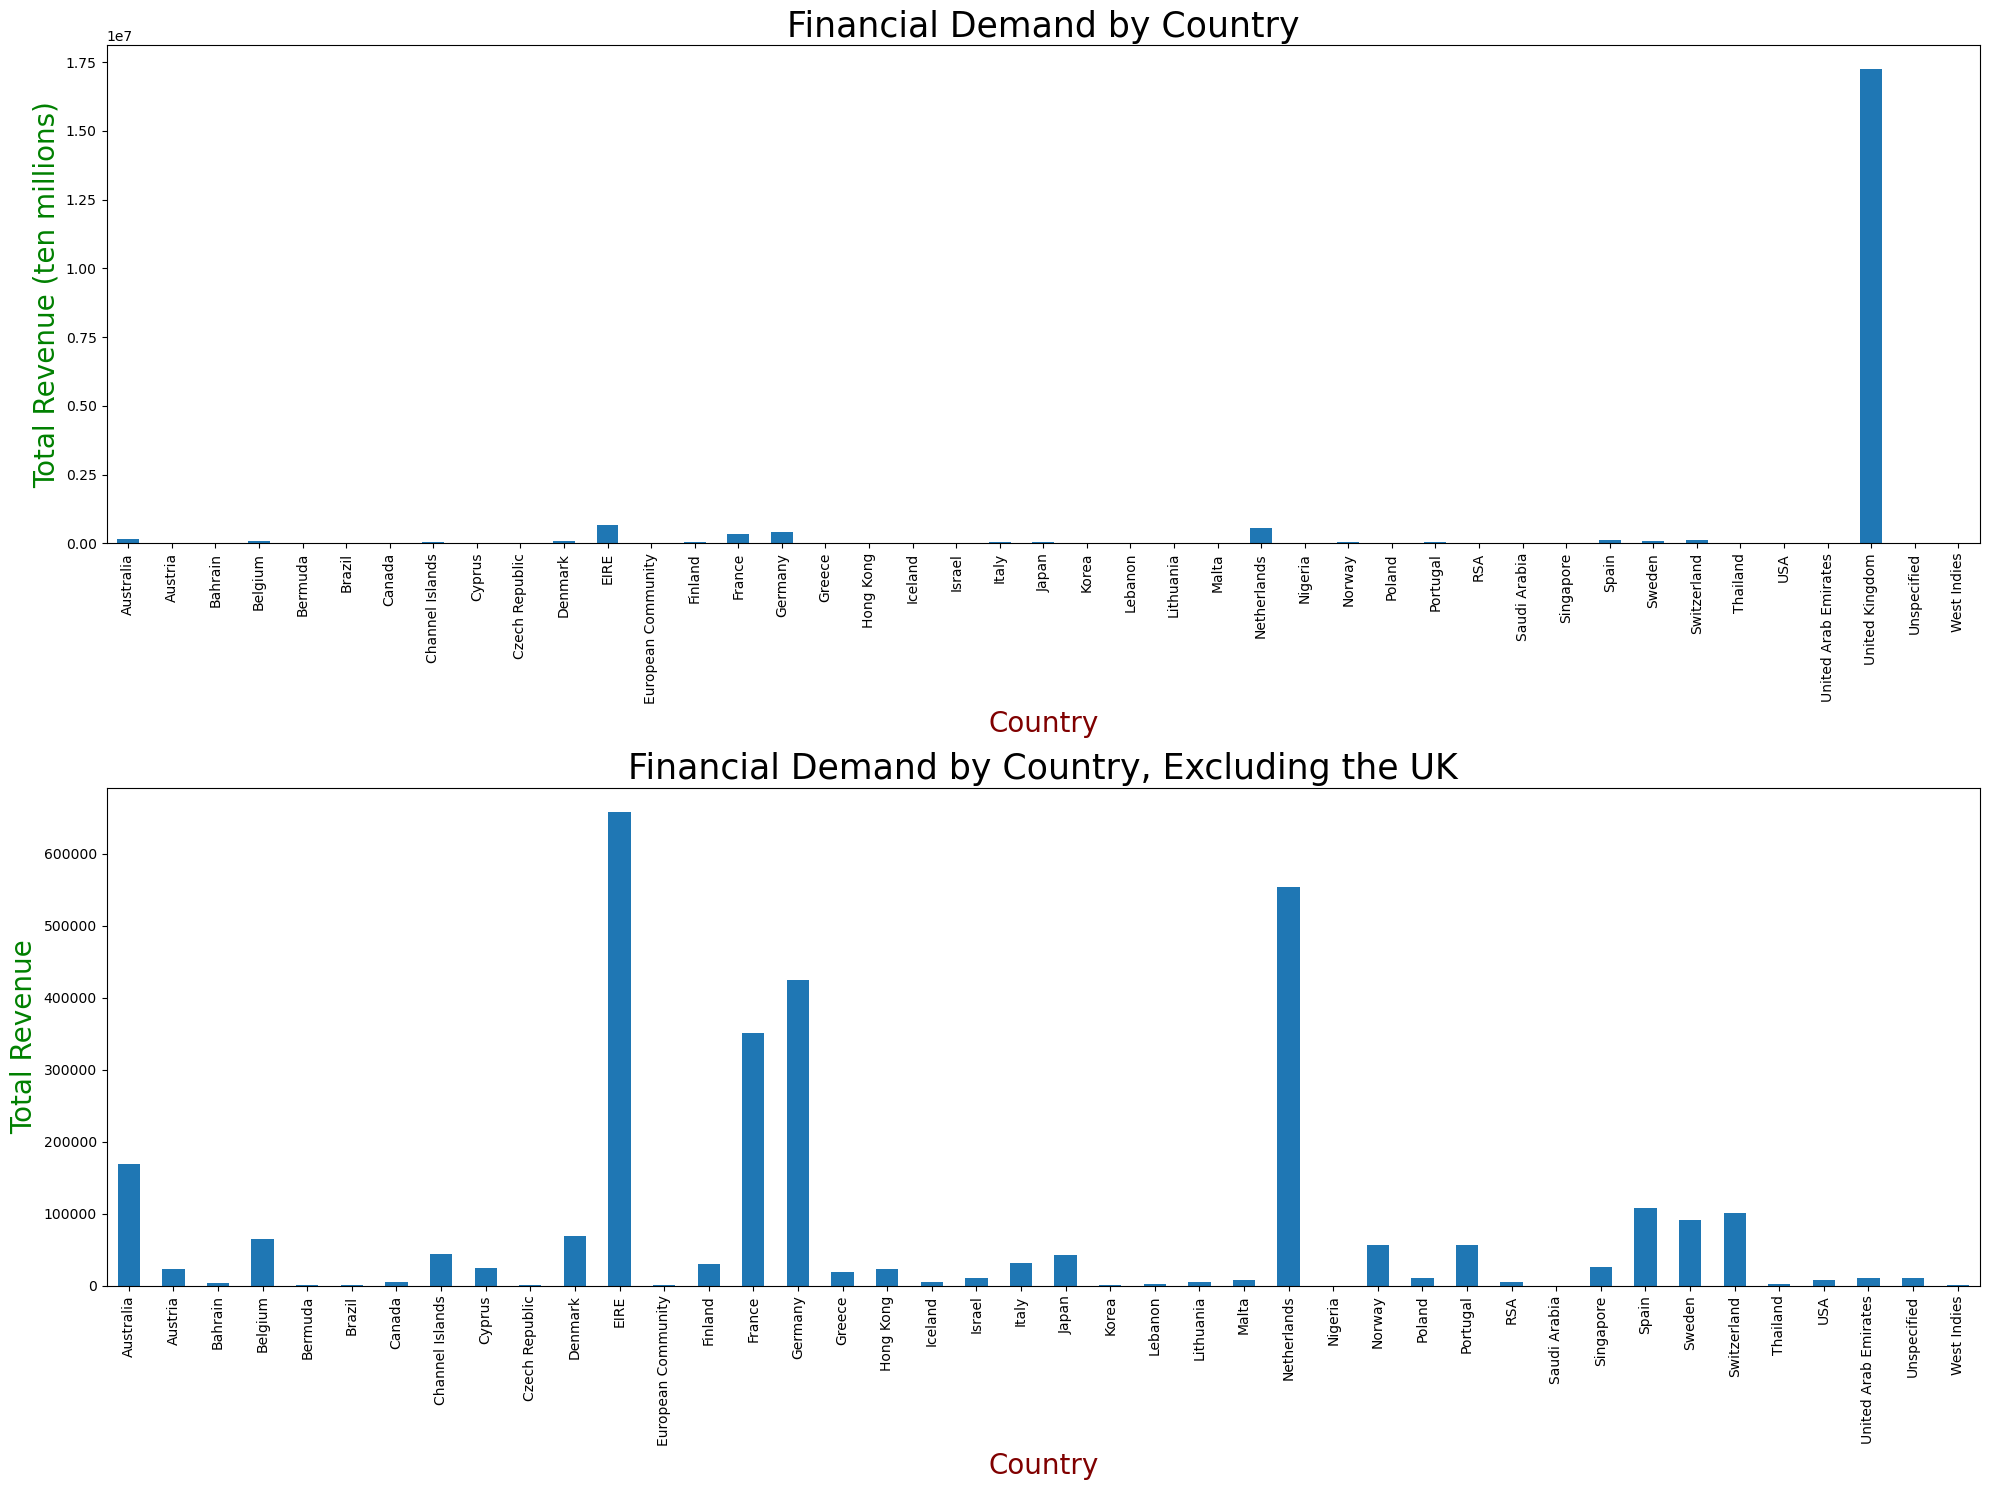

In [368]:
store_data = pd.concat([year0910_data, year1011_data]).drop_duplicates().reset_index(drop=True) #combining the store data using concat to make things easier, making sure to drop duplicate rows
store_data_sales = store_data.loc[store_data['Quantity'] > 0] # get the data where the quantity is not negative, since negative quantity is presumably a return or error
store_data_sales['Total_Revenue'] = store_data_sales['Quantity'] * store_data_sales['Price'] #new column for total revenue from sales

country_total_rev = store_data_sales.groupby('Country')['Total_Revenue'].sum().round(2) # create series grouping by country & total revenue summarized, round to 2 decimal points because it's a price

country_rev_noUK = country_total_rev.drop('United Kingdom') # remove the UK for easier visualization/interpretation of other countries

fig, axs = plt.subplots(2, 1, figsize=(20, 15)) # create figure with 2 subplots
country_total_rev.plot(kind='bar', ax=axs[0]) # bar plots from data sets
country_rev_noUK.plot(kind='bar', ax=axs[1])

axs[0].set_title('Financial Demand by Country',fontsize=25) # decorate the plots to make them look nice
axs[1].set_title('Financial Demand by Country, Excluding the UK',fontsize=25)
axs[0].set_ylabel('Total Revenue (ten millions)', fontsize=20, color='green') # total revenue, clarify ten millions (1.75 is highest shown on graph, actually 17.5 million)
axs[1].set_ylabel('Total Revenue', fontsize=20, color='green')
axs[0].set_xlabel('Country', fontsize=20, color='maroon')
axs[1].set_xlabel('Country', fontsize=20, color='maroon')

fig.tight_layout() 

## Question 2: How do countries compare in physical demand?

In this question, I wanted to see how countries compared by total physical demand. To do this, I grouped the data by the sum of quantity sold per country, and plotted this grouped data. 

Like before, I created a second bar graph excluding the UK to look at other countries in more detail. 

From these graphs, it can be seen that **the UK, Denmark, the Netherlands, EIRE, France, and Germany had the highest total physical demand**. This is interesting because, as seen previously, Denmark was not one of the countries with the highest financial demand. 

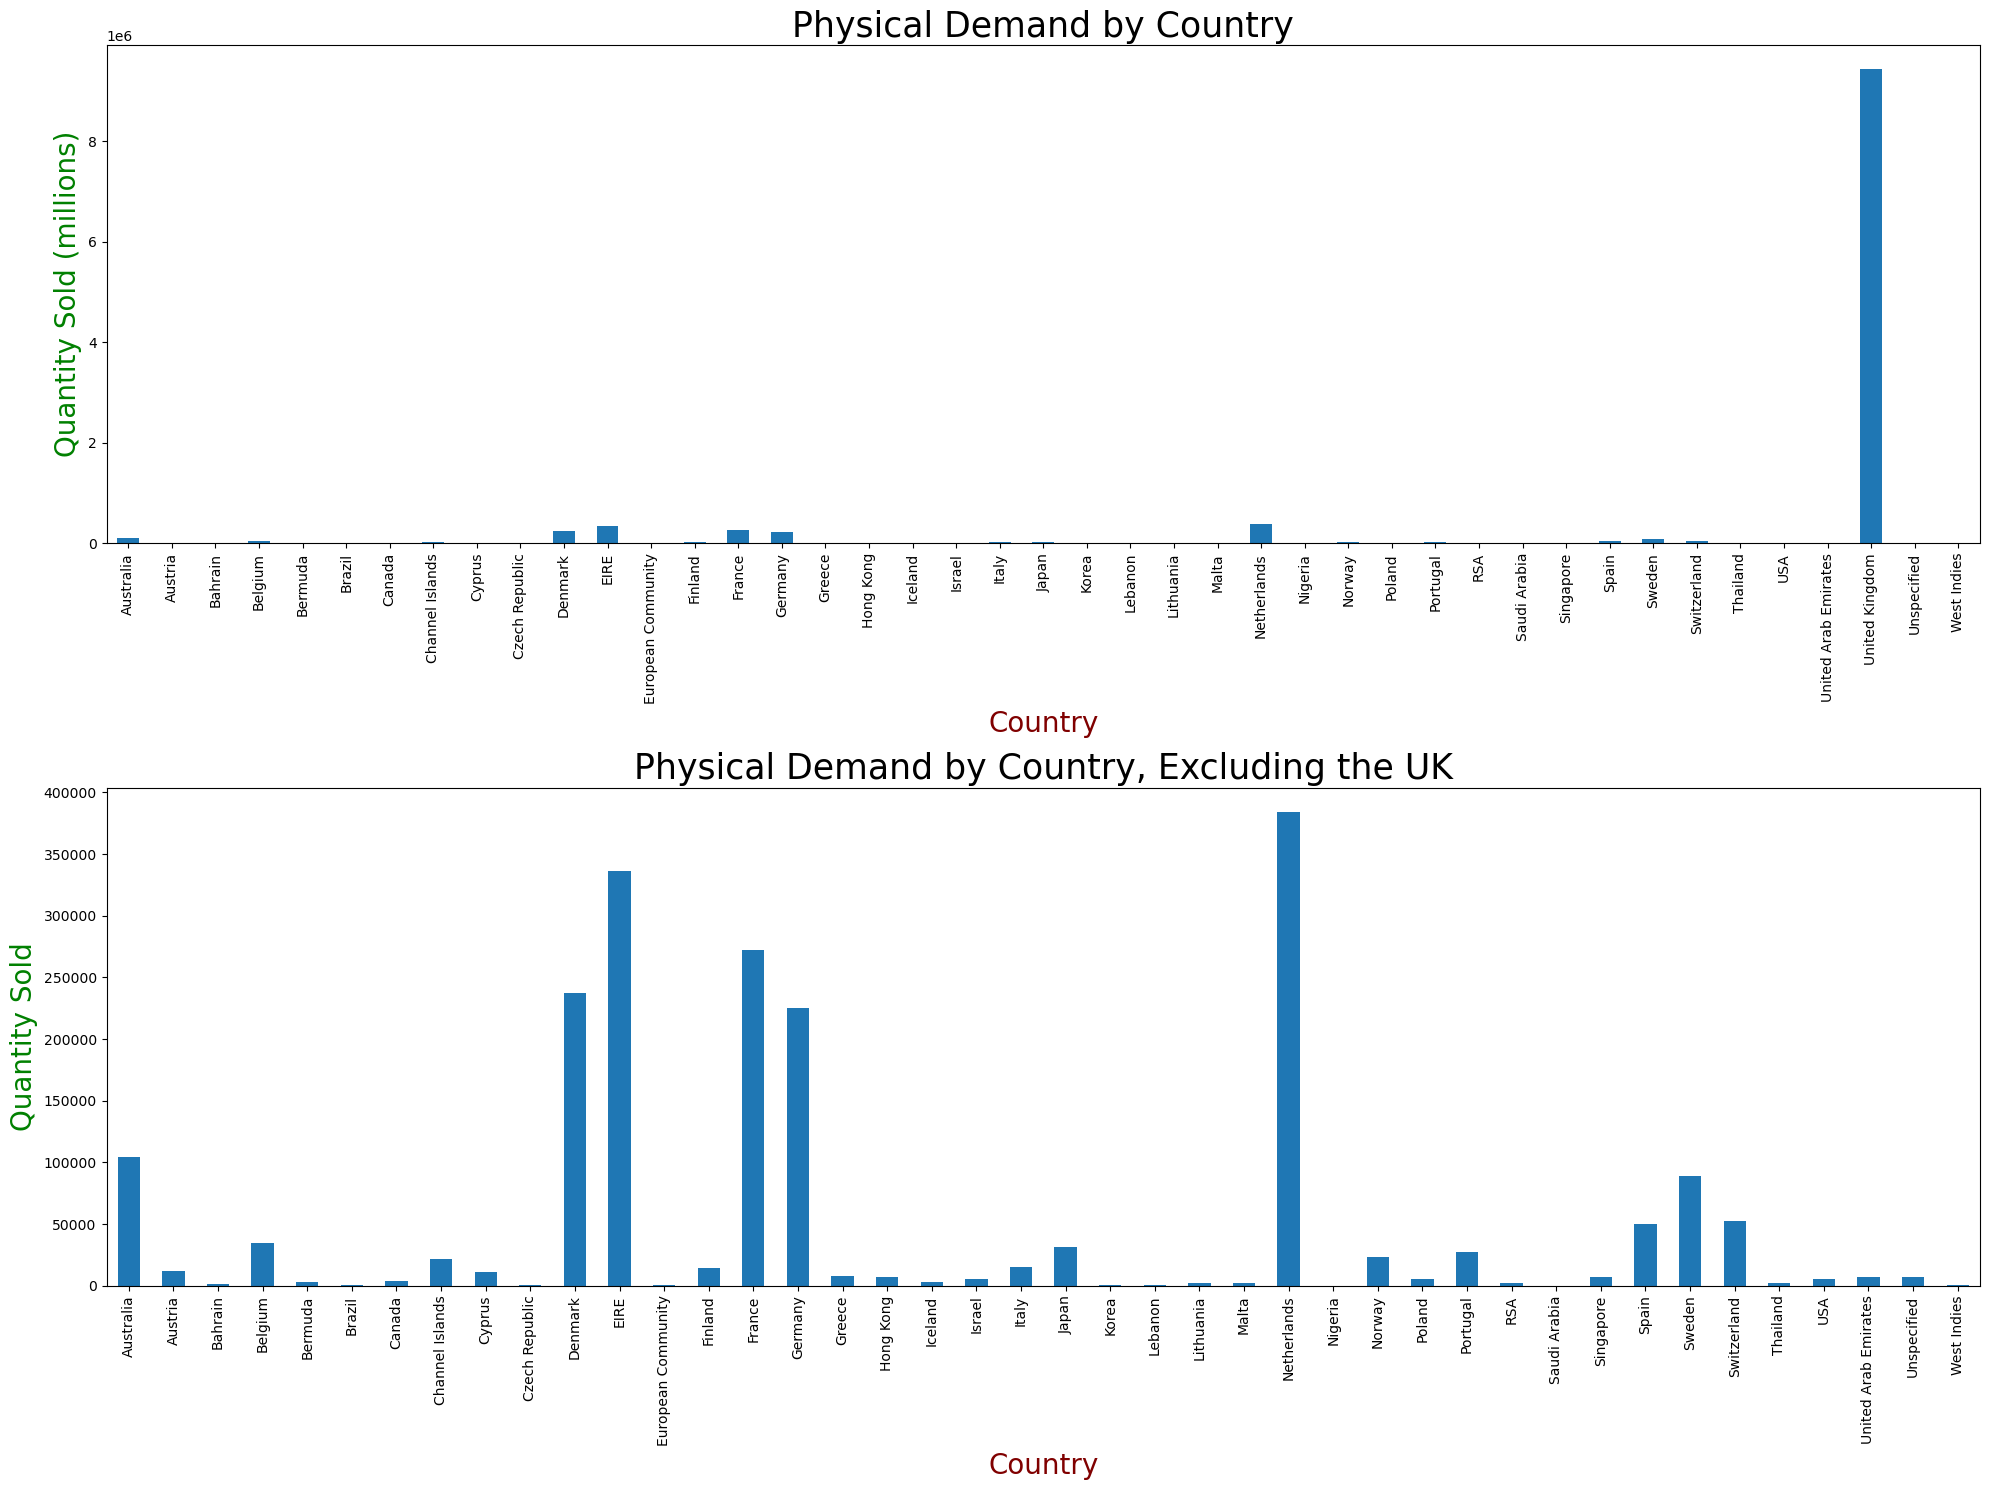

In [366]:
country_phys_data = store_data_sales.groupby('Country')['Quantity'].sum() # group by country & sum of quantities of sold product

country_phys_noUK_data = country_phys_data.drop('United Kingdom') # drop UK for this set

fig, axs = plt.subplots(2, 1, figsize=(20, 15)) # create figure with 2 subplots
country_phys_data.plot(kind='bar', ax=axs[0]) # create bar plots from data sets
country_phys_noUK_data.plot(kind='bar', ax=axs[1])

axs[0].set_title('Physical Demand by Country',fontsize=25) 
axs[1].set_title('Physical Demand by Country, Excluding the UK',fontsize=25)
axs[0].set_ylabel('Quantity Sold (millions)', fontsize=20, color='green')
axs[1].set_ylabel('Quantity Sold', fontsize=20, color='green')
axs[0].set_xlabel('Country', fontsize=20, color='maroon')
axs[1].set_xlabel('Country', fontsize=20, color='maroon')

fig.tight_layout()

## Question 3: Is there seasonal demand for some of the products?

For this question, I wanted to see if there was seasonal demand for some of the products. To make things easier to interpret, I sampled ten random products. 

I then created subplots for each of these products going by the Invoice date and Quantity sold. 

Looking at the graphs, it's clear that some are demanded all year (21931, for instance), while others are demanded at certain times.
Product 21626 is bought more during Spring, but specifically during April.
Product 21802 is bought more during Fall/Winter, which makes sense as it is a Christmas product. 

So **yes, there is seasonal demand for some of the products in the table.**

In [350]:
# store_data_sales['StockCode'].value_counts().sample(10) 
# Find 10 random StockCodes. I'm using value_counts to make sure they show up more than once in the table.
# These are the values I got (StockCode, value count) 
# 84288B      26 
# 22893      183
# 47574A     130
# 21829      413
# 21802      325
# 85114A     103
# 21626      206
# 22898      474
# 21931     2353
# 22483      351 
prod_list = ['84288B', '22893', '47574A', '21829', '21802', '85114A', '21626', '22898','21931','22483']
store_sample = store_data_sales.loc[store_data_sales['StockCode'].isin(prod_list)]
store_sample

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Revenue
373,489517,21931,JUMBO STORAGE BAG SUKI,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom,1.95
484,489522,21829,DINOSAUR KEYRINGS ASSORTED,36,2009-12-01 11:45:00,0.21,15998.0,United Kingdom,7.56
812,489536,21931,JUMBO STORAGE BAG SUKI,5,2009-12-01 12:13:00,1.95,16393.0,United Kingdom,9.75
1567,489574,84288B,SET/2 BLUE NOODLE BASKETS,1,2009-12-01 13:31:00,1.95,13097.0,United Kingdom,1.95
1800,489594,21931,JUMBO STORAGE BAG SUKI,2,2009-12-01 14:19:00,1.95,15005.0,United Kingdom,3.90
...,...,...,...,...,...,...,...,...,...
1031823,581492,21931,JUMBO STORAGE BAG SUKI,1,2011-12-09 10:03:00,4.13,NaN,United Kingdom,4.13
1032164,581492,22898,CHILDRENS APRON APPLES DESIGN,1,2011-12-09 10:03:00,4.13,NaN,United Kingdom,4.13
1032435,581497,22898,CHILDRENS APRON APPLES DESIGN,2,2011-12-09 10:23:00,4.96,NaN,United Kingdom,9.92
1032503,581498,21931,JUMBO STORAGE BAG SUKI,6,2011-12-09 10:26:00,4.13,NaN,United Kingdom,24.78


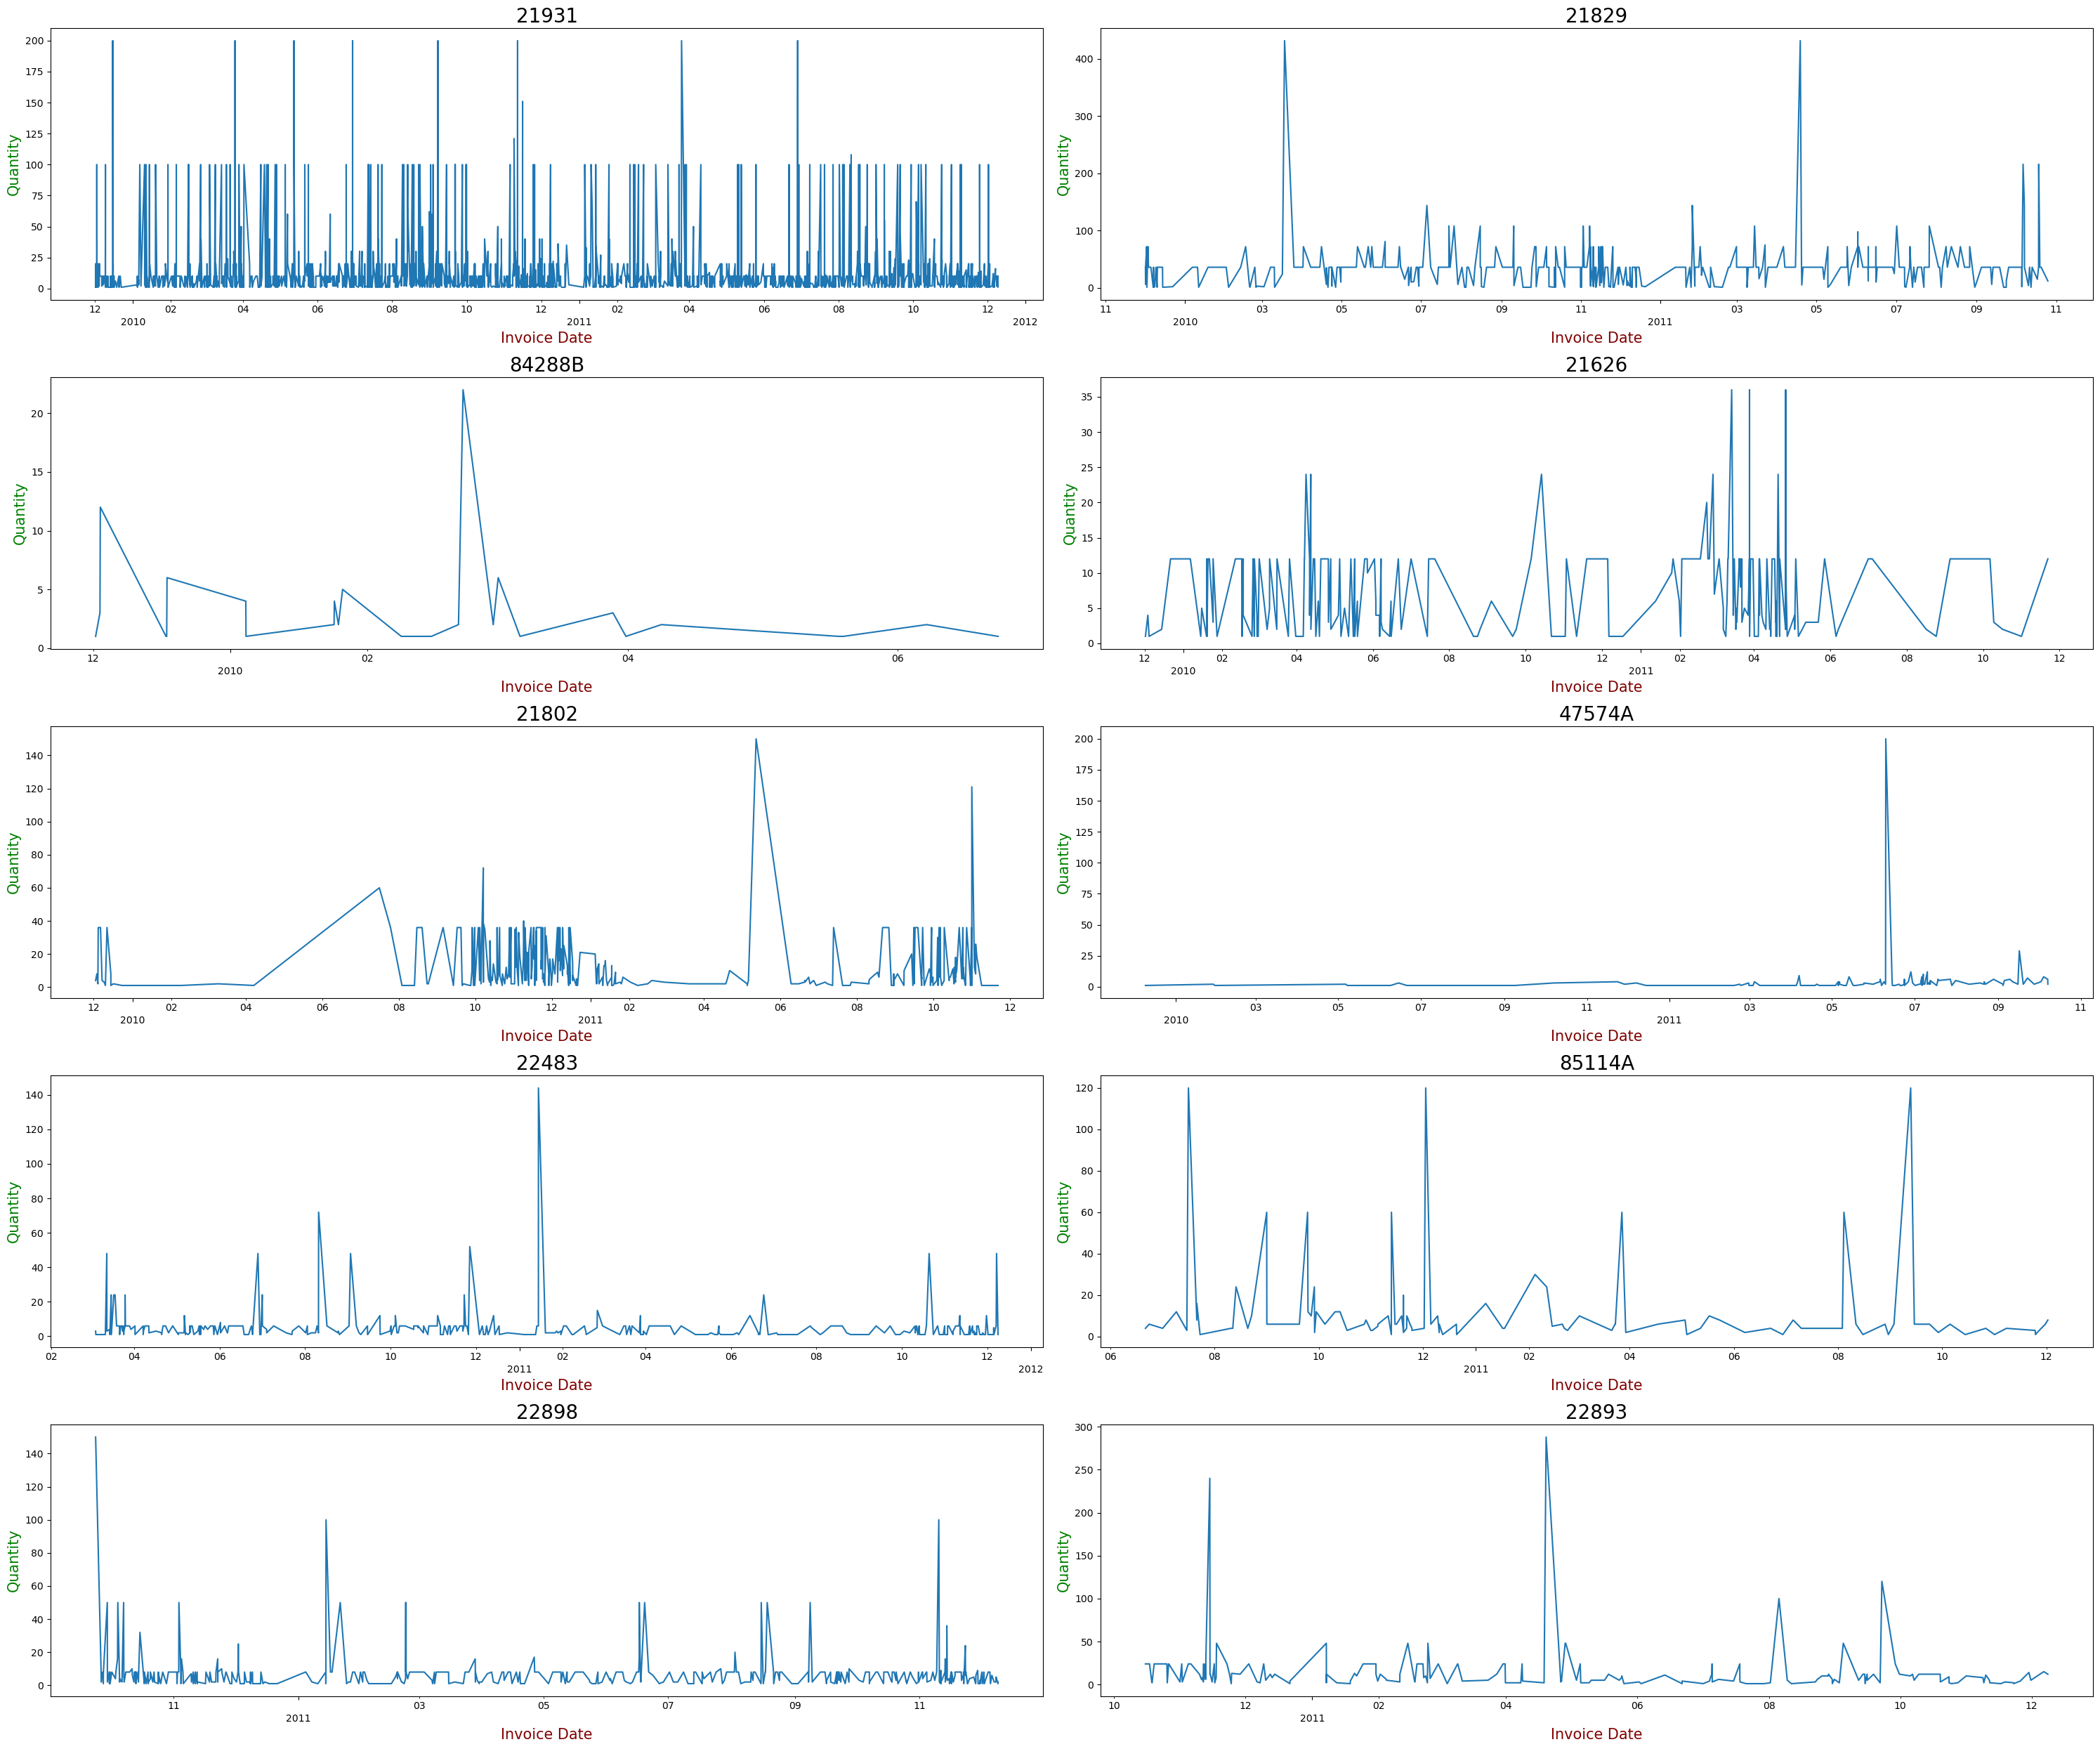

In [364]:
fig, axs = plt.subplots(5, 2, figsize=(30, 25))
for stock, ax in zip(store_sample['StockCode'].unique(), axs.flatten()): # subplot for each product 
    
    ix = (store_sample['StockCode'] == stock) # make sure to only get current stock code
    ax.plot(store_sample.loc[ix, 'InvoiceDate'], store_sample.loc[ix, 'Quantity']) #plot it- date on x axis, quantity on y axis
    
    ax.set_xlabel('Invoice Date', fontsize=15, color='maroon') # set x axis label to Date
    ax.set_ylabel('Quantity', fontsize=15, color='green') # set y axis label to Quantity

    ax.xaxis.set_major_locator(dates.YearLocator()) # format x axis to go by year & month
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n%Y'))
    ax.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%m'))
    ax.set_title(stock, fontsize=20, color='black') # set the title of each subplot to the specific fuel type

fig.tight_layout()

## Question 4: What are the top 10 products with the lowest return rates?

The goal of this question is to find the top 10 products with the lowest return rates. 

The top 10 products with the lowest return rates are: 
1. 35961 - FOLKART ZINC HEART CHRISTMAS DEC	
2. 22549 - PICTURE DOMINOES
3. 22539 - MINI JIGSAW DOLLY GIRL	
4. 47503F - ASS FLORAL PRINT TORCH
5. 22594 - CHRISTMAS GINGHAM TREE
6. 21802 - CHRISTMAS TREE HEART DECORATION
7. 22546 - MINI JIGSAW
8. 22813 - PACK 3 BOXES BIRD PANETTONE
9. 22749 - FELTCRAFT PRINCESS CHARLOTTE DOLL
10. 22115 - METAL SIGN EMPIRE TEA

There is also a bar graph below displaying these products and their return rate percentages.

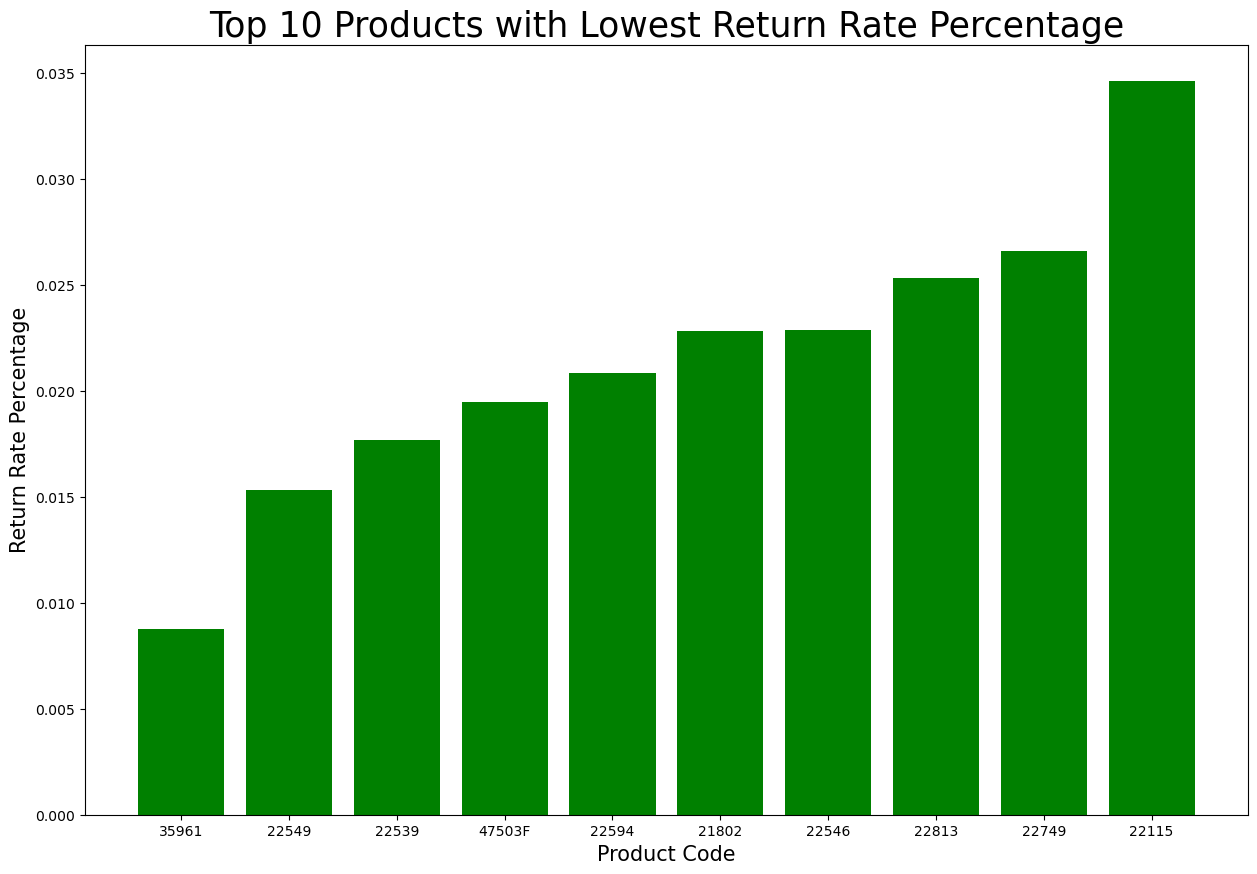

   index StockCode  Quantity Returned  Quantity Sold  Return Rate  \
0   2550     35961                  1        11430.0     0.000087   
1   1652     22549                  1         6521.0     0.000153   
2   1645     22539                  1         5654.0     0.000177   
3   2720    47503F                  1         5139.0     0.000195   
4   1692     22594                  1         4791.0     0.000209   
5   1051     21802                  1         4377.0     0.000228   
6   1649     22546                  1         4375.0     0.000229   
7   1891     22813                  1         3945.0     0.000253   
8   1834     22749                  1         3759.0     0.000266   
9   1280     22115                  1         2889.0     0.000346   

   Return Rate Percentage  
0                0.008749  
1                0.015335  
2                0.017687  
3                0.019459  
4                0.020872  
5                0.022847  
6                0.022857  
7               

In [296]:
store_data_returns = store_data.loc[store_data['Quantity'] < 0].reset_index() # find the rows where quantity is less than 0 because these are returns, reset the index
products_returned = store_data_returns.groupby('StockCode')['Quantity'].sum().abs().reset_index() # group by stockcode & quantity, summarize quantity per stock code, & get absolute value so it isn't negative when dividing for return rate 

products_sold = store_data_sales.groupby('StockCode')['Quantity'].sum().reset_index() # data series of products sold, group by stockcode & quantity like before, abs not needed since the quantity is > 0 in store_data_sales 

return_data = products_returned.merge(products_sold, on='StockCode', how='left', suffixes=(' Returned', ' Sold')) # merge the two, going by left since I only want items that have been returned

return_data['Return Rate'] = (return_data['Quantity Returned']/return_data['Quantity Sold']) # add a column with the return rate of each product
return_data['Return Rate Percentage'] = return_data['Return Rate'] * 100  # add a column of return rate percentage just so it's easier to interpret

return_data = return_data.sort_values(by='Return Rate', ascending=True).reset_index() # sort by return rate values, ascending
return_data = return_data.dropna() # drop rows with null values since they could mess with graph visualization
return_data_top10 = return_data.head(10) # dataset of the top 10 lowest values since i sorted by return rate values earlier

plt.figure(figsize=(15, 10)) # create figure
plt.bar(return_data_top10['StockCode'], return_data_top10['Return Rate Percentage'], color='green') #bar plot, stock codes on x axis, return rate percentages on y axis
plt.xlabel('Product Code', fontsize=15) # labels & title
plt.ylabel('Return Rate Percentage', fontsize=15)
plt.title('Top 10 Products with Lowest Return Rate Percentage', fontsize=25)
plt.show()
print(return_data_top10)

## Question 5: How many purchases have customers made on average? How often, on average, do customers return?

To answer these questions, I first grouped the sales data (combined data done in question 1) by Customer ID & the number of unique invoices. This creates a series of the number of purchases per Customer ID. 

Secondly, I created a seperate list that contains all of the purchase dates per Customer ID, and added a column of the average time between these dates using a function I created (function is explained in comments of code below).

I then merged these together to show per Customer ID how often each customer makes purchases and their average return time. 

Using the describe method, it can be seen that customers make about **6 purchases on average in this table**. In addition, **customers return around 5 days between purchases on average**. 

In [204]:
customer_freq = store_data_sales.groupby('Customer ID')['Invoice'].nunique().reset_index() #group by the customer ID & number of unique invoices. using store_data_sales because I want to see sales only, no returns
customer_freq = customer_freq.rename(columns={'Invoice' : 'Number of Purchases'}) # rename the second column so it makes more sense
# print(customer_freq)
purchase_dates = store_data_sales.groupby('Customer ID')['InvoiceDate'].apply(list).reset_index()
purchase_dates = purchase_dates.rename(columns={'InvoiceDate' : 'Purchase Dates'})

def calc_time_btwn(dates):
    dates = sorted(dates) #make sure dates are sorted in chronological order so that the times between them can be calculated correctly
    if (len(dates) < 2):
        return pd.Timedelta(0) # if the customer has only purchased once, return a timedelta val of 0 since they have never returned
    diffs = [dates[i+1] - dates[i] for i in range(len(dates)-1)] # calculate the time differences between each pair, creates a list of time intervals
    avg_diff = sum(diffs, pd.Timedelta(0)) / len(diffs) # calculate the average difference by dividing the sum of intervals by the length (num of intervals)
    return avg_diff

purchase_dates['AverageTimeBtwnPurchases'] = purchase_dates['Purchase Dates'].apply(calc_time_btwn) # create a new column of the average time per customer, fill it by applying the function to the purchase dates column

customer_analysis = pd.merge(customer_freq, purchase_dates[['Customer ID', 'AverageTimeBtwnPurchases']], on='Customer ID') # merge the data
print(customer_analysis, '\n') # display the customer analysis
print(customer_analysis['Number of Purchases'].describe(), '\n') # display analysis of numerical data columns
print(customer_analysis['AverageTimeBtwnPurchases'].describe()) 

      Customer ID  Number of Purchases   AverageTimeBtwnPurchases
0         12346.0                   12 12 days 02:57:10.909090909
1         12347.0                    8  1 days 19:39:46.968325791
2         12348.0                    5     7 days 06:12:16.800000
3         12349.0                    4  3 days 06:44:18.965517241
4         12350.0                    1            0 days 00:00:00
...           ...                  ...                        ...
5876      18283.0                   22  0 days 16:46:16.905016008
5877      18284.0                    1            0 days 00:00:00
5878      18285.0                    1            0 days 00:00:00
5879      18286.0                    2  3 days 17:50:10.909090909
5880      18287.0                    7  3 days 10:25:32.727272727

[5881 rows x 3 columns] 

count    5881.000000
mean        6.287196
std        13.012879
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       398.000000
Name: Number 

Below is a histogram displaying the distribution of average time between purchases. It can be seen that frequent customers mostly return in an average of 1-3 days.

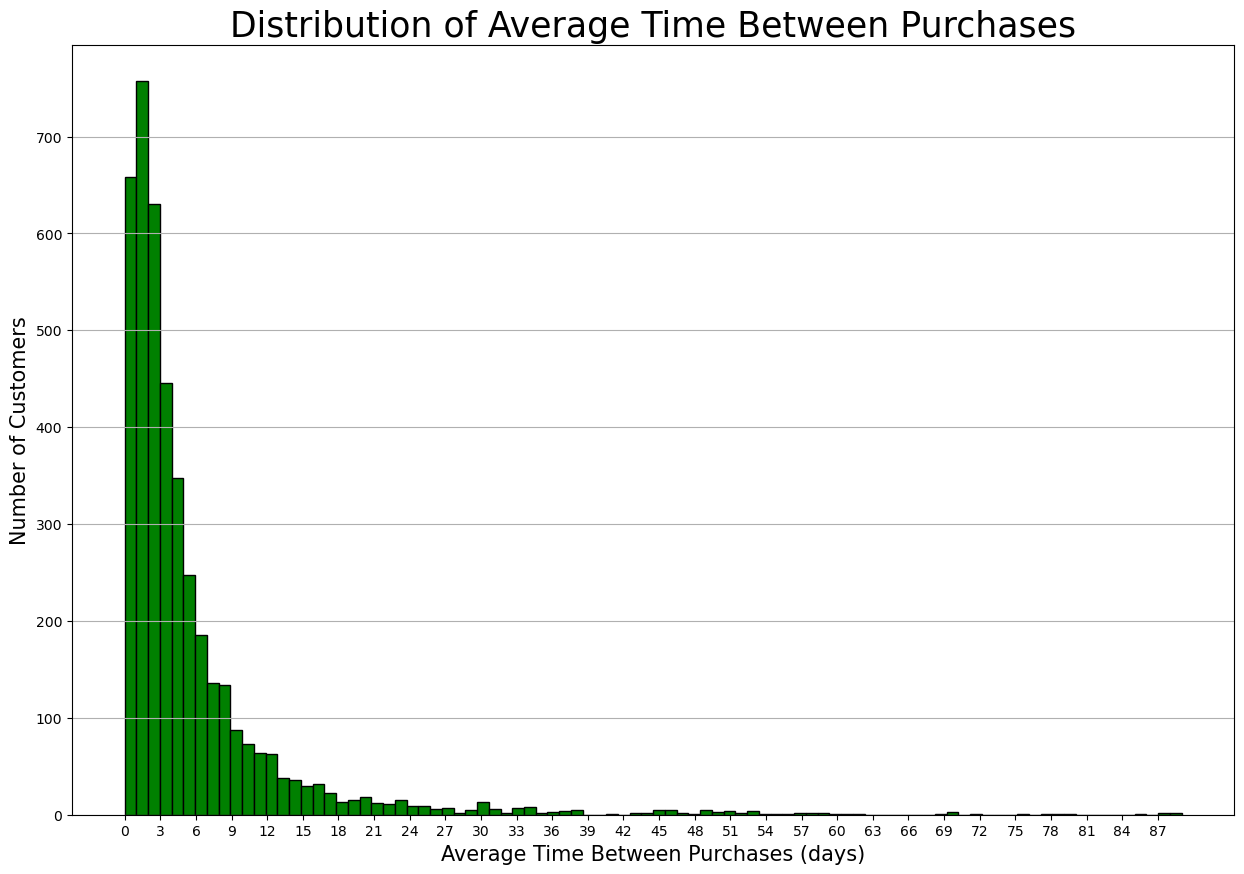

In [203]:
customers_under100 = customer_analysis.loc[(customer_analysis['AverageTimeBtwnPurchases'].dt.days < 90) & (customer_analysis['AverageTimeBtwnPurchases'] != pd.Timedelta(0))] # showing customers that returned, and returned within 90 days, so that majority of data is more visible

plt.figure(figsize=(15, 10)) # create figure
plt.hist(customers_under100['AverageTimeBtwnPurchases'].dt.days, bins=90, color='green', edgecolor='black') # plot histogram, 90 bins to show more details
plt.xlabel('Average Time Between Purchases (days)', fontsize=15) # add labels, change font sizes
plt.ylabel('Number of Customers', fontsize=15)
plt.title('Distribution of Average Time Between Purchases', fontsize=25)
plt.xticks(np.arange(0, 90, 3)) # change the amount of ticks to show more detail
plt.grid(axis='y') # add grid on y axis so that it's easier to see
plt.show()